In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip

In [2]:
data = np.loadtxt("process_tomography_20230102.txt",max_rows=27690)

In [3]:
data

array([[0.00000000e+00, 1.54000000e+03, 1.67270675e+09, ...,
        5.78478364e-07, 7.92265666e-07, 1.33954131e-07],
       [0.00000000e+00, 1.54000000e+03, 1.67270675e+09, ...,
        5.65875609e-07, 8.14766793e-07, 1.40295029e-07],
       [0.00000000e+00, 1.54000000e+03, 1.67270675e+09, ...,
        5.19831872e-07, 7.53603388e-07, 1.28581107e-07],
       ...,
       [0.00000000e+00, 1.56000000e+03, 1.67271115e+09, ...,
        6.81172025e-07, 2.41788086e-07, 4.89863623e-07],
       [0.00000000e+00, 1.56000000e+03, 1.67271115e+09, ...,
        7.53294728e-07, 2.50665806e-07, 4.87518321e-07],
       [0.00000000e+00, 1.56000000e+03, 1.67271115e+09, ...,
        6.54469147e-07, 2.15577586e-07, 4.81313918e-07]])

In [4]:
time_h_1540 = []
time_h_1545 = []
time_h_1550 = []
time_h_1555 = []
time_h_1560 = []
time_d_1540 = []
time_d_1545 = []
time_d_1550 = []
time_d_1555 = []
time_d_1560 = []

In [5]:
vh_h_1540 = []
vh_h_1545 = []
vh_h_1550 = []
vh_h_1555 = []
vh_h_1560 = []
vh_d_1540 = []
vh_d_1545 = []
vh_d_1550 = []
vh_d_1555 = []
vh_d_1560 = []

In [6]:
da_h_1540 = []
da_h_1545 = []
da_h_1550 = []
da_h_1555 = []
da_h_1560 = []
da_d_1540 = []
da_d_1545 = []
da_d_1550 = []
da_d_1555 = []
da_d_1560 = []

In [7]:
def extract_data(lh,ld,lt,d):
    vh = d[4]/d[3]
    pd = d[5]/(d[6]+d[5])
    pa = d[6]/(d[6]+d[5])
    lt.append(datetime.datetime.fromtimestamp(d[2]))
    lh.append(vh)
    ld.append((pd-pa)/(2*np.sin(np.arctan(vh))))

In [8]:
for i,d in enumerate(data):
    if d[0] == 0:
        if d[1] == 1540:
            extract_data(vh_h_1540,da_h_1540,time_h_1540,d)
        if d[1] == 1545:
            extract_data(vh_h_1545,da_h_1545,time_h_1545,d)
        if d[1] == 1550:
            extract_data(vh_h_1550,da_h_1550,time_h_1550,d)
        if d[1] == 1555:
            extract_data(vh_h_1555,da_h_1555,time_h_1555,d)
        if d[1] == 1560:
            extract_data(vh_h_1560,da_h_1560,time_h_1560,d)
    if d[0] == 1:
        if d[1] == 1540:
            extract_data(vh_d_1540,da_d_1540,time_d_1540,d)
        if d[1] == 1545:
            extract_data(vh_d_1545,da_d_1545,time_d_1545,d)
        if d[1] == 1550:
            extract_data(vh_d_1550,da_d_1550,time_d_1550,d)
        if d[1] == 1555:
            extract_data(vh_d_1555,da_d_1555,time_d_1555,d)
        if d[1] == 1560:
            extract_data(vh_d_1560,da_d_1560,time_d_1560,d)

Text(0.5, 1.0, 'Rantoul Loop VH Polarization')

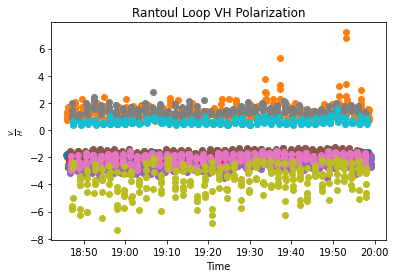

In [10]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(time_h_1540,vh_h_1540,label='H 1540',ls='',marker='o')
ax.plot(time_h_1545,vh_h_1545,label='H 1545',ls='',marker='o')
ax.plot(time_h_1550,vh_h_1550,label='H 1550',ls='',marker='o')
ax.plot(time_h_1555,vh_h_1555,label='H 1555',ls='',marker='o')
ax.plot(time_h_1560,vh_h_1560,label='H 1560',ls='',marker='o')
ax.plot(time_d_1540,vh_d_1540,label='D 1540',ls='',marker='o')
ax.plot(time_d_1545,vh_d_1545,label='D 1545',ls='',marker='o')
ax.plot(time_d_1550,vh_d_1550,label='D 1550',ls='',marker='o')
ax.plot(time_d_1555,vh_d_1555,label='D 1555',ls='',marker='o')
ax.plot(time_d_1560,vh_d_1560,label='D 1560',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
#ax.set_ylim(bottom=-1,top=100)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")

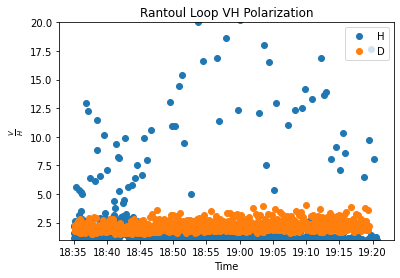

In [10]:
fig, ax = plt.subplots()
num_points = 1000
ax.plot(time_h[:num_points],vh_h[:num_points],label='H',ls='',marker='o')
ax.plot(time_d[:num_points],vh_d[:num_points],label='D',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=1,top=20)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=1)

In [18]:
avg_vh_h_1540 = np.mean(np.array(vh_h_1540).reshape(-1, 6), axis=1)
avg_vh_h_1545 = np.mean(np.array(vh_h_1545).reshape(-1, 6), axis=1)
avg_vh_h_1550 = np.mean(np.array(vh_h_1550).reshape(-1, 6), axis=1)
avg_vh_h_1555 = np.mean(np.array(vh_h_1555).reshape(-1, 6), axis=1)
avg_vh_h_1560 = np.mean(np.array(vh_h_1560).reshape(-1, 6), axis=1)
avg_vh_d_1540 = np.mean(np.array(vh_d_1540)[:-5].reshape(-1, 6), axis=1)
avg_vh_d_1545 = np.mean(np.array(vh_d_1545)[:-5].reshape(-1, 6), axis=1)
avg_vh_d_1550 = np.mean(np.array(vh_d_1550)[:-5].reshape(-1, 6), axis=1)
avg_vh_d_1555 = np.mean(np.array(vh_d_1555)[:-5].reshape(-1, 6), axis=1)
avg_vh_d_1560 = np.mean(np.array(vh_d_1560)[:-5].reshape(-1, 6), axis=1)

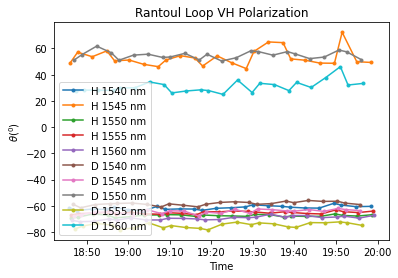

In [19]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1540[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1540[:num_points][::2])),label='H 1540 nm',ls='-',marker='.')
ax.plot(time_h_1545[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1545[:num_points][::2])),label='H 1545 nm',ls='-',marker='.')
ax.plot(time_h_1550[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
ax.plot(time_h_1555[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1555[:num_points][::2])),label='H 1555 nm',ls='-',marker='.')
ax.plot(time_h_1560[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1560[:num_points][::2])),label='H 1560 nm',ls='-',marker='.')
ax.plot(time_d_1540[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1540[:num_points][::2])),label='D 1540 nm',ls='-',marker='.')
ax.plot(time_d_1545[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1545[:num_points][::2])),label='D 1545 nm',ls='-',marker='.')
ax.plot(time_d_1550[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
ax.plot(time_d_1555[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1555[:num_points][::2])),label='D 1555 nm',ls='-',marker='.')
ax.plot(time_d_1560[::6][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1560[:num_points][::2])),label='D 1560 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=3)
#plt.savefig('vh_drift_20221214.pdf')

In [21]:
avg_da_h_1540 = np.mean(np.array(da_h_1540).reshape(-1, 6), axis=1)
avg_da_h_1545 = np.mean(np.array(da_h_1545).reshape(-1, 6), axis=1)
avg_da_h_1550 = np.mean(np.array(da_h_1550).reshape(-1, 6), axis=1)
avg_da_h_1555 = np.mean(np.array(da_h_1555).reshape(-1, 6), axis=1)
avg_da_h_1560 = np.mean(np.array(da_h_1560).reshape(-1, 6), axis=1)
avg_da_d_1540 = np.mean(np.array(da_d_1540)[:-5].reshape(-1, 6), axis=1)
avg_da_d_1545 = np.mean(np.array(da_d_1545)[:-5].reshape(-1, 6), axis=1)
avg_da_d_1550 = np.mean(np.array(da_d_1550)[:-5].reshape(-1, 6), axis=1)
avg_da_d_1555 = np.mean(np.array(da_d_1555)[:-5].reshape(-1, 6), axis=1)
avg_da_d_1560 = np.mean(np.array(da_d_1560)[:-5].reshape(-1, 6), axis=1)

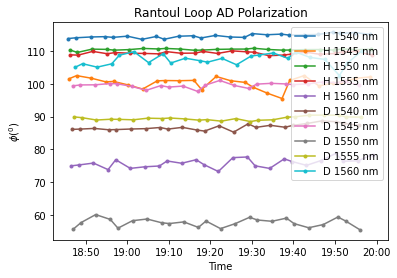

In [22]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1540[::6][:num_points][::2],np.degrees(np.arccos(avg_da_h_1540[:num_points][::2])),label='H 1540 nm',ls='-',marker='.')
ax.plot(time_h_1545[::6][:num_points][::2],np.degrees(np.arccos(avg_da_h_1545[:num_points][::2])),label='H 1545 nm',ls='-',marker='.')
ax.plot(time_h_1550[::6][:num_points][::2],np.degrees(np.arccos(avg_da_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
ax.plot(time_h_1555[::6][:num_points][::2],np.degrees(np.arccos(avg_da_h_1555[:num_points][::2])),label='H 1555 nm',ls='-',marker='.')
ax.plot(time_h_1560[::6][:num_points][::2],np.degrees(np.arccos(avg_da_h_1560[:num_points][::2])),label='H 1560 nm',ls='-',marker='.')
ax.plot(time_d_1540[::6][:num_points][::2],np.degrees(np.arccos(avg_da_d_1540[:num_points][::2])),label='D 1540 nm',ls='-',marker='.')
ax.plot(time_d_1545[::6][:num_points][::2],np.degrees(np.arccos(avg_da_d_1545[:num_points][::2])),label='D 1545 nm',ls='-',marker='.')
ax.plot(time_d_1550[::6][:num_points][::2],np.degrees(np.arccos(avg_da_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
ax.plot(time_d_1555[::6][:num_points][::2],np.degrees(np.arccos(avg_da_d_1555[:num_points][::2])),label='D 1555 nm',ls='-',marker='.')
ax.plot(time_d_1560[::6][:num_points][::2],np.degrees(np.arccos(avg_da_d_1560[:num_points][::2])),label='D 1560 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(loc=1)

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


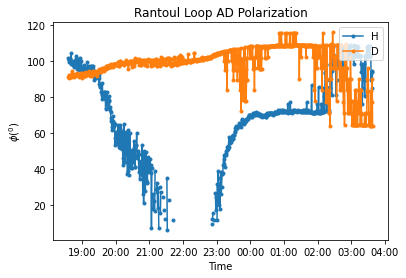

In [17]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h[::8][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h[:num_points][::2])),label='H',ls='-',marker='.')
ax.plot(time_d[::8][:num_points][::2],np.degrees(np.arccos(avg_da_d[:num_points][::2])),label='D',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=44.99,top=45.01)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(loc=1)
#plt.savefig("ad_drift_20221214.pdf")

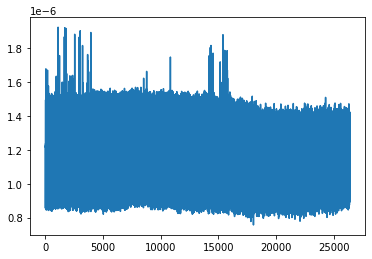

In [16]:
tot = []
for d in data:
    tot.append(d[2]+d[3])
plt.plot(tot)

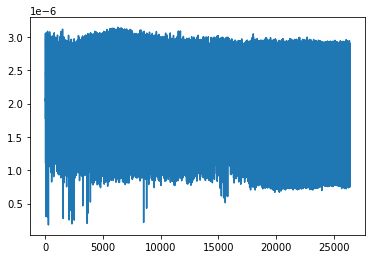

In [17]:
tot = []
for d in data:
    tot.append(d[3]+d[5])
plt.plot(tot)

In [32]:
data[-6:]

array([[ 1.55500000e+03,  1.67111548e+09, -1.31226955e-07,
         1.07597498e-06,  1.61163189e-06,  1.59969750e-06],
       [ 1.55500000e+03,  1.67111549e+09, -1.25736051e-07,
         1.08233871e-06,  1.63152231e-06,  1.60056766e-06],
       [ 1.56000000e+03,  1.67111549e+09, -9.81567609e-08,
         1.08845302e-06,  1.66471477e-06,  1.66471477e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.58216788e-07,
         3.72609122e-07,  1.77063180e-06,  1.70524163e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.53849167e-07,
         3.86546589e-07,  1.72774298e-06,  1.74875231e-06],
       [ 1.56000000e+03,  1.67111549e+09,  9.64955689e-07,
         3.63404467e-07,  1.76715093e-06,  1.76180538e-06]])

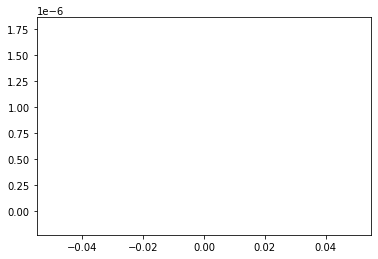